## Experiment Description: Drawing Balls with Replacement

This experiment simulates drawing balls from a bag without replacement and calculates the probability of getting a specific number of white balls.

**Parameters:**

* `N`: Total number of balls in the bag (20 in this example).
* `N1`: Number of white balls in the bag (12 in this example).
* `n`: Sample size (number of balls drawn each time) (3 in this example).
* `T`: Number of trials (repetitions of drawing n balls) (1000 in this example).

**Simulation Process:**

1. A bag is created with `N` balls, where `N1` are white and `N-N1` are red.
2. The experiment is run for `T` trials.
3. In each trial, `n` balls are drawn without replacement from the bag.
4. The number of white balls drawn in each trial is recorded.

**Analysis:**

1. The code calculates the count and experimental probability of getting each possible number of white balls (0, 1, 2, or 3 in this example).
2. The code also calculates the theoretical probability for each outcome using the hypergeometric distribution formula.
3. The results are presented in a table with columns for:
    * Number of white balls drawn
    * Count (number of trials with that outcome)
    * Experimental probability (count divided by total trials)
    * Theoretical Probability (calculated using hypergeometric distribution)

**Expected Outcome:**

The experimental probabilities should be close to the theoretical probabilities, indicating that the simulation reflects the expected behavior of drawing balls without replacement.

**Code Breakdown:**

The provided code defines two functions:

* `simulate_experiment`: This function simulates the experiment by drawing balls and recording the number of white balls in each trial.
* `calculate_probabilities`: This function analyzes the results from the DataFrame, calculates counts and probabilities for each number of white balls drawn, and compares them to the theoretical probabilities from the hypergeometric distribution.

**Further Exploration:**

* You can experiment with different values for `N`, `N1`, `n`, and `T` to see how they affect the results.
* You can visualize the results using a bar chart or histogram.


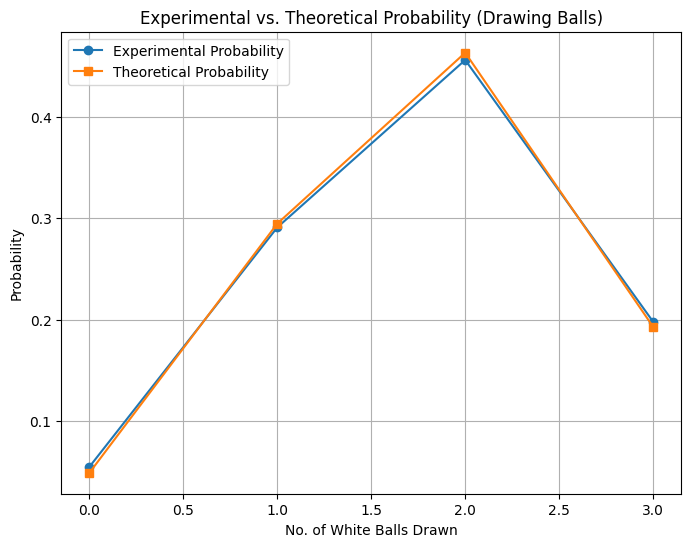

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import random

def simulate_experiment(N, N1, n, T):
  """
  Simulates drawing n balls from N balls (N1 white, N2 red) T times.

  Args:
      N: Total number of balls.
      N1: Number of white balls.
      n: Sample size (number of balls drawn).
      T: Number of trials (repetitions of drawing n balls).

  Returns:
      A Pandas DataFrame with columns for Trial (1 to T), 
      each ball drawn and "No.of white balls".
  """
  results = []
  for trial in range(1, T + 1):  # Loop for T trials
    # Create a copy of the balls (without replacement simulation)
    balls = ["white"] * N1 + ["red"] * (N - N1)
    drawn_balls = []
    white_balls_drawn = 0
    for _ in range(n):
      # Randomly draw a ball and remove it from the list
      ball_drawn = random.choice(balls)
      drawn_balls.append(ball_drawn)
      if ball_drawn == "white":
        white_balls_drawn += 1
      balls.remove(ball_drawn)
    # Add balls drawn and total white balls as columns for this trial
    result = {"Trial": trial, "No.of white balls": white_balls_drawn}
    for i in range(n):
      result["Ball {}".format(i + 1)] = drawn_balls[i]
    results.append(result)
  df = pd.DataFrame(results)
  return df

def calculate_probabilities(df, N1, n):
  """
  Calculates the count and probability of each number of white balls drawn.

  Args:
      df: Pandas DataFrame from the simulation.
      N1: Number of white balls.
      n: Sample size (number of balls drawn).

  Returns:
      A dictionary containing counts and probabilities for each number of white balls.
  """
  # Calculate the theoretical probability for each outcome (assuming hypergeometric distribution)
  theoretical_probs = {}
  for k in range(n + 1):
    theoretical_probs[k] = (comb(N1, k) * comb(N - N1, n - k)) / comb(N, n)

  # Count the number of trials with each number of white balls
  value_counts = df['No.of white balls'].value_counts().sort_index()

  # Combine counts and theoretical probabilities into a dictionary
  results = {
      'No.of white balls': value_counts.index.tolist(),
      'COUNT': value_counts.tolist(),
      'Experimental probability': (value_counts / T).tolist(),
      'Theoretical Probability': [theoretical_probs[x] for x in value_counts.index.tolist()]
  }
  return results

# Define helper function for calculating combinations (n choose k)
def comb(n, k):
  """
  Calculates the number of combinations (n choose k).
  """
  from math import factorial
  return factorial(n) // (factorial(k) * factorial(n - k))

# Example usage
N = 20
N1 = 12
n = 3
T = 1000  # Number of trials

# Simulate the experiment
results_df = simulate_experiment(N, N1, n, T)

# Calculate outcome counts and probabilities
results = calculate_probabilities(results_df.copy(), N1, n)  # Copy to avoid modifying original DataFrame

# Plot Experimental probability vs Theoretical Probability
plt.figure(figsize=(8, 6))
plt.plot(results['No.of white balls'], results['Experimental probability'], marker='o', label='Experimental Probability')
plt.plot(results['No.of white balls'], results['Theoretical Probability'], marker='s', label='Theoretical Probability')
plt.xlabel('No. of White Balls Drawn')
plt.ylabel('Probability')
plt.title('Experimental vs. Theoretical Probability (Drawing Balls)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
pd.DataFrame(results)

,No.of white balls,COUNT,Experimental probability,Theoretical Probability
0,0,55,0.055,0.049123
1,1,291,0.291,0.294737
2,2,456,0.456,0.463158
3,3,198,0.198,0.192982


In [13]:
results_df.to_csv("Hyper.csv")